In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
print(df.shape)

(18249, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.drop(['Unnamed: 0', 'AveragePrice'], axis=1, inplace=True)

In [9]:
df.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:>

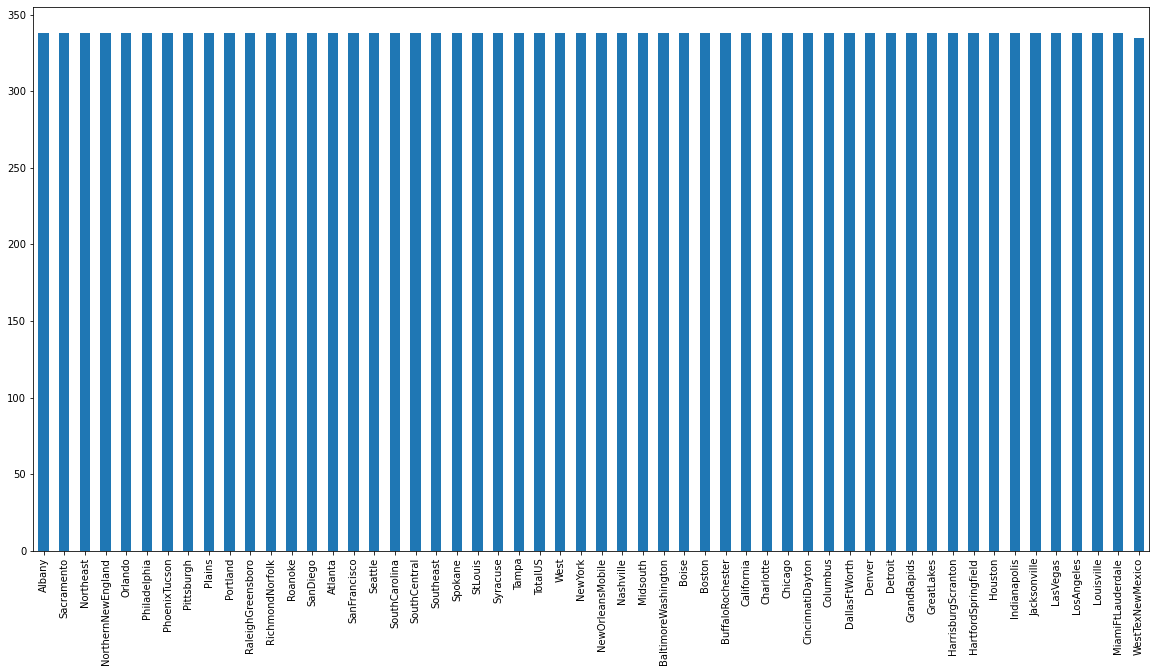

In [11]:
df['region'].value_counts().plot(kind='bar', figsize=(20,10))

In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['region'])
pd.Series(df2)

df['region']=df2
df


,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


<AxesSubplot:>

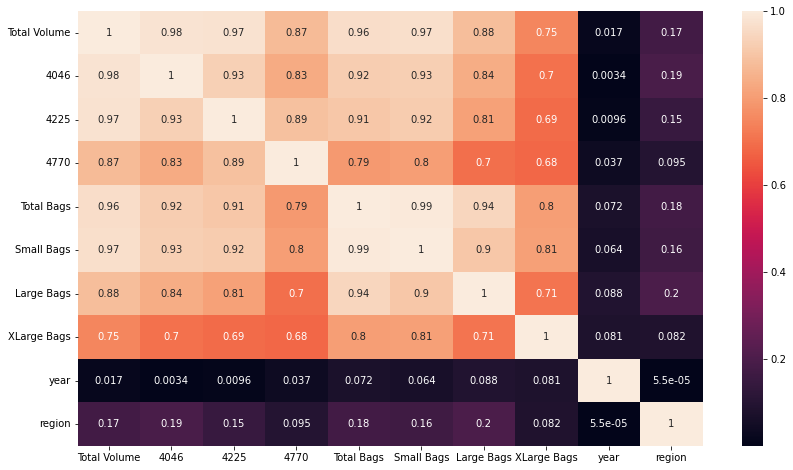

In [14]:
df_corr=df.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})



In [15]:

df

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [16]:
df.rename(columns={'XLarge Bags': 'XLarge_bags'}, inplace=True)
df.rename(columns={'Total Bags': 'Total_bags'}, inplace=True)
df.rename(columns={'Large Bags': 'Large_bags'}, inplace=True)
df

,Date,Total Volume,4046,4225,4770,Total_bags,Small Bags,Large_bags,XLarge_bags,type,year,region
0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


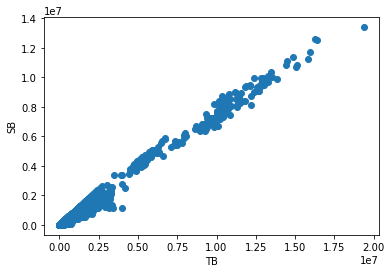

In [17]:
df.rename(columns={'Small Bags': 'Small_bags'}, inplace=True)
plt.scatter(df.Total_bags, df.Small_bags)
plt.xlabel('TB')
plt.ylabel('SB')
plt.show()


In [18]:
df.drop(['Date'], axis=1, inplace=True)

In [19]:
df

,Total Volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [20]:


df2=lab_enc.fit_transform(df['type'])
pd.Series(df2)

df['type']=df2
df


,Total Volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,XLarge_bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [21]:
X=df.drop(columns=['region'])
y=df['region']

x_train,x_test, y_train, y_test= train_test_split(X, y, test_size= 0.24, random_state=105)


In [22]:
def metric_score(clf, x_train,x_test, y_train, y_test, train=True):		
	if train:	
		y_pred=clf.predict(x_train)
		print(f"accuracy score: {accuracy_score(y_train, y_pred) *100:.2f}%")
		
	elif train==False:	
		pred=clf.predict(x_test)
		print(f"accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
		print('classification report', classification_report(y_test, pred, digits=2))


In [23]:
clf=KNeighborsClassifier()
clf.fit(x_train, y_train)



KNeighborsClassifier()

In [24]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)


accuracy score: 77.13%
accuracy score: 66.69%
classification report               precision    recall  f1-score   support

           0       0.63      0.84      0.72        82
           1       0.64      0.66      0.65        74
           2       0.73      0.75      0.74        80
           3       0.66      0.74      0.70        82
           4       0.74      0.83      0.78        84
           5       0.55      0.62      0.58        79
           6       0.82      0.83      0.82        87
           7       0.65      0.77      0.70        82
           8       0.86      0.85      0.86        80
           9       0.62      0.71      0.66        76
          10       0.44      0.59      0.51        74
          11       0.59      0.81      0.68        67
          12       0.61      0.55      0.58        74
          13       0.66      0.68      0.67        88
          14       0.63      0.62      0.63        80
          15       0.81      0.77      0.79        74
          16 

In [25]:
from sklearn.model_selection import GridSearchCV 

param_grid={ 'algorithm':['kd_tree', 'brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

gridsearch= GridSearchCV(estimator=clf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [26]:
print(gridsearch.best_score_)


0.6430876478848595


In [27]:
gridsearch.best_estimator_


KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [28]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)
knn.fit(x_train, y_train)

metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)




accuracy score: 81.32%
accuracy score: 66.48%
classification report               precision    recall  f1-score   support

           0       0.59      0.77      0.67        82
           1       0.54      0.70      0.61        74
           2       0.67      0.78      0.72        80
           3       0.62      0.79      0.70        82
           4       0.70      0.80      0.74        84
           5       0.50      0.63      0.56        79
           6       0.82      0.92      0.86        87
           7       0.62      0.79      0.70        82
           8       0.88      0.89      0.88        80
           9       0.59      0.70      0.64        76
          10       0.37      0.59      0.45        74
          11       0.61      0.79      0.69        67
          12       0.57      0.61      0.59        74
          13       0.68      0.70      0.69        88
          14       0.59      0.62      0.61        80
          15       0.77      0.77      0.77        74
          16 

In [29]:
y_pred=knn.predict(x_test)
cfm=confusion_matrix(y_test, y_pred)
cfm

array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 52,  2, ...,  0,  0,  1],
       [ 0,  1, 62, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 78,  0,  0],
       [ 0,  0,  0, ...,  0, 71,  0],
       [ 0,  4,  0, ...,  0,  0, 39]], dtype=int64)

In [30]:
data=pd.read_csv('avocado.csv')

In [31]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


In [32]:
data.shape

(18249, 14)

In [33]:
data.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [34]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [35]:
data.drop(columns=['Unnamed: 0','Date','region','XLarge Bags'], inplace=True)
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic,2018


In [36]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['type'])
pd.Series(df2)

data['type']=df2
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018


<AxesSubplot:>

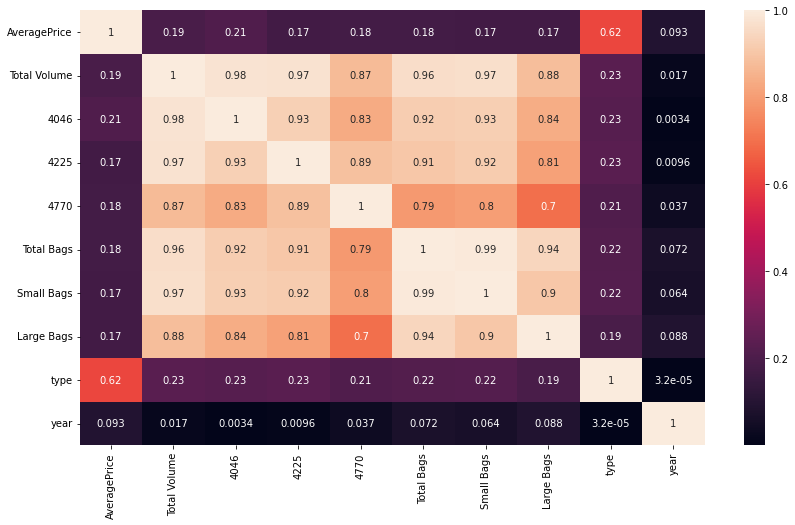

In [37]:
data_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(data_corr, annot=True, annot_kws={'size':10})


In [38]:
data.rename(columns={'Small Bags': 'Small_bags'}, inplace=True)
data.rename(columns={'Total Bags': 'Total_bags'}, inplace=True)
data.rename(columns={'Large Bags': 'Large_bags'}, inplace=True)
data.rename(columns={'Total Volume': 'Total_volume'}, inplace=True)
data

,AveragePrice,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018


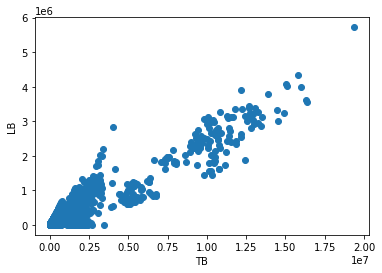

In [39]:
plt.scatter(data.Total_bags, data.Large_bags)
plt.xlabel('TB')
plt.ylabel('LB')
plt.show()


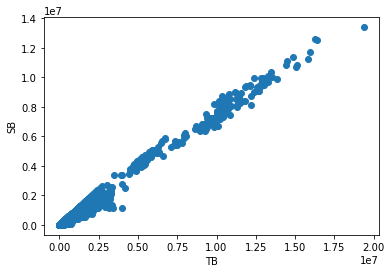

In [40]:
plt.scatter(data.Total_bags, data.Small_bags)
plt.xlabel('TB')
plt.ylabel('SB')
plt.show()

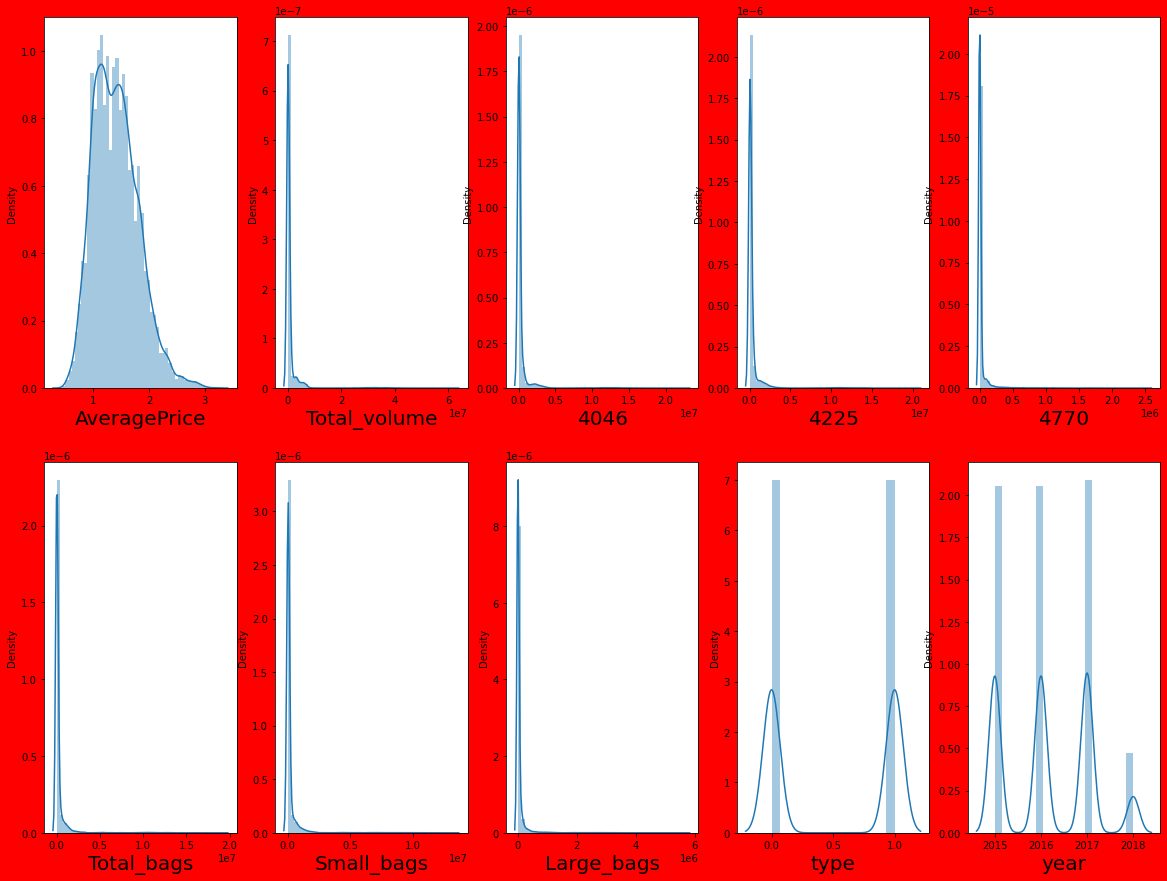

In [41]:
plt.figure(figsize=(20,15), facecolor='red')			
plotnumber=1			
			
for column in data:			
	if plotnumber<=10:		
		ax=plt.subplot(2,5,plotnumber)	
		sns.distplot(data[column])	
		plt.xlabel(column,fontsize=20)	
			
	plotnumber+=1		
plt.show()			


In [42]:
from scipy.stats import zscore
z_score=zscore(data[['Total_volume','4046', '4225', '4770', 'type']])
abs_z_score= np.abs(z_score)
filtering_entry= (abs_z_score < 3).all(axis=1)


In [43]:
data=data[filtering_entry]
data.describe()


,AveragePrice,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,type,year
count,17969.000000,1.796900e+04,1.796900e+04,1.796900e+04,17969.000000,1.796900e+04,1.796900e+04,1.796900e+04,17969.000000,17969.000000
mean,1.411784,5.135657e+05,1.737179e+05,1.782002e+05,12183.108042,1.494624e+05,1.133958e+05,3.435893e+04,0.507708,2016.148589
std,0.402431,1.153208e+06,4.845430e+05,4.218608e+05,36625.060569,3.531895e+05,2.690859e+05,1.124363e+05,0.499954,0.939963
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.062943e+04,8.242100e+02,2.924840e+03,0.000000,4.930250e+03,2.726040e+03,1.148200e+02,0.000000,2015.000000
50%,1.380000,1.015221e+05,7.925810e+03,2.717719e+04,168.320000,3.811792e+04,2.497194e+04,2.489420e+03,1.000000,2016.000000
75%,1.670000,4.055556e+05,1.022156e+05,1.346190e+05,5553.600000,1.052169e+05,8.001508e+04,1.982618e+04,1.000000,2017.000000
max,3.250000,1.056506e+07,4.085859e+06,3.894802e+06,344488.510000,4.014132e+06,3.398570e+06,2.838239e+06,1.000000,2018.000000


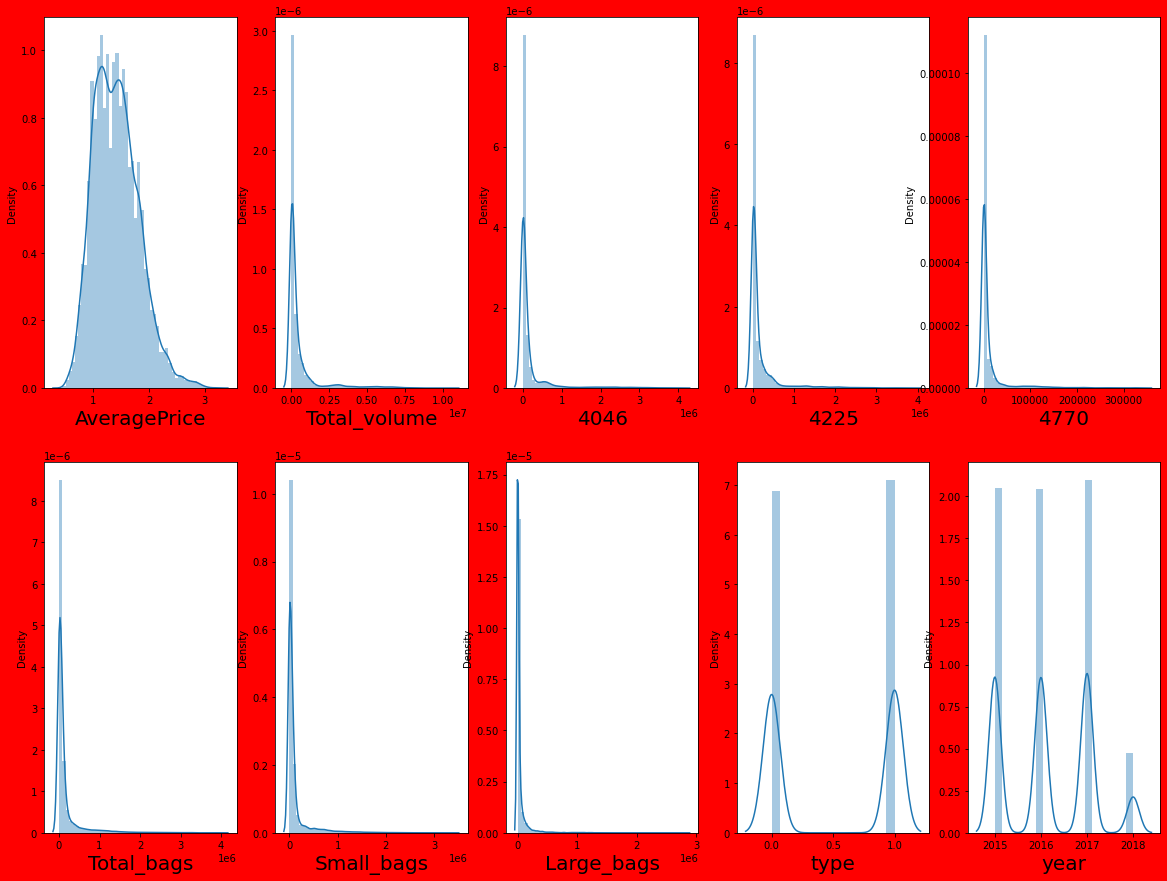

In [44]:
plt.figure(figsize=(20,15), facecolor='red')			
plotnumber=1			
			
for column in data:			
	if plotnumber<=10:		
		ax=plt.subplot(2,5,plotnumber)	
		sns.distplot(data[column])	
		plt.xlabel(column,fontsize=20)	
			
	plotnumber+=1		
plt.show()			


In [45]:
data['Total_volume']=data['Total_volume'].apply(np.log)
data

,AveragePrice,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,type,year
0,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015
1,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015
2,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015
3,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015
4,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018
18245,1.71,9.538783,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018
18246,1.87,9.530012,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018
18247,1.93,9.693089,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018


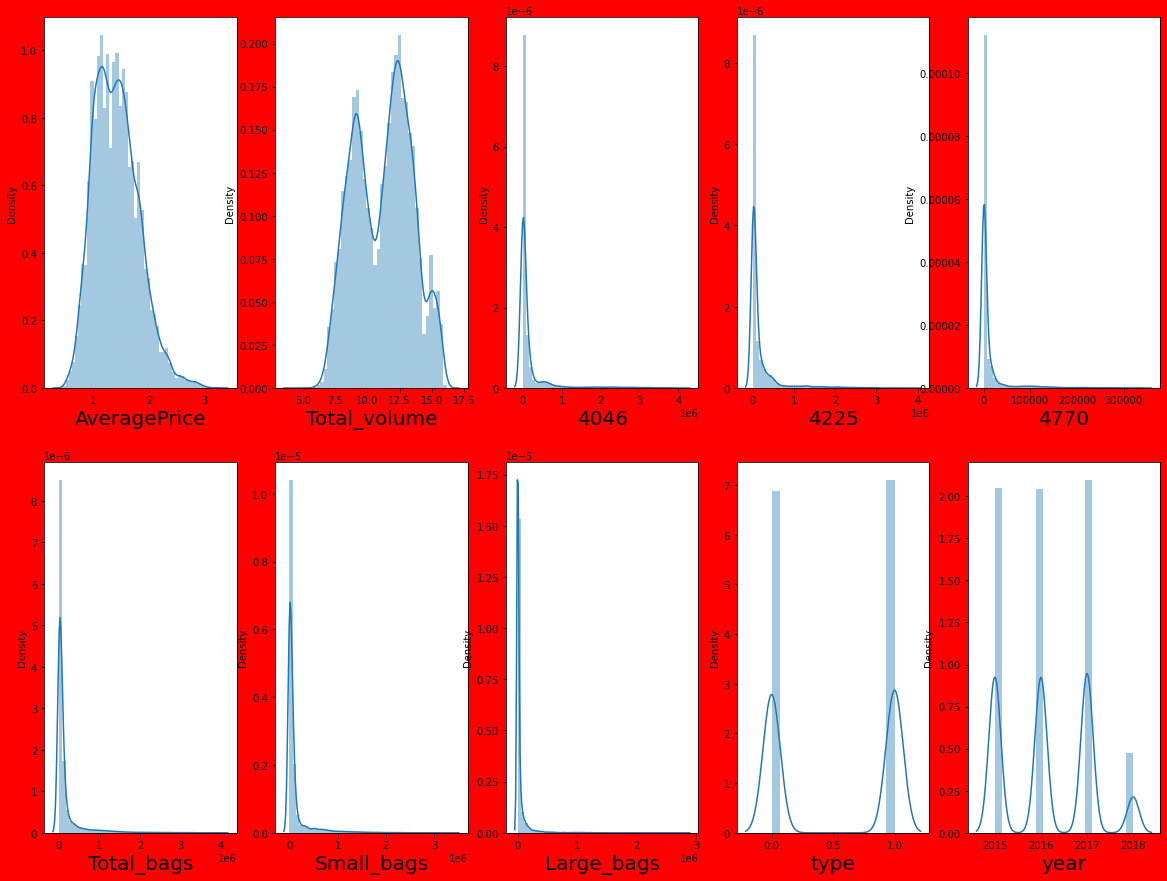

In [46]:
plt.figure(figsize=(20,15), facecolor='red')			
plotnumber=1			
			
for column in data:			
	if plotnumber<=10:		
		ax=plt.subplot(2,5,plotnumber)	
		sns.distplot(data[column])	
		plt.xlabel(column,fontsize=20)	
			
	plotnumber+=1		
plt.show()	

In [47]:
# Assuming 'data' is your DataFrame and 'column_name' is the name of the column
data['4046'] = data['4046'].apply(lambda x: 1/x if x != 0 else 0)
data

,AveragePrice,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,type,year
0,1.33,11.070329,0.000965,54454.85,48.16,8696.87,8603.62,93.25,0,2015
1,1.35,10.912849,0.001483,44638.81,58.33,9505.56,9408.07,97.49,0,2015
2,0.93,11.680304,0.001258,109149.67,130.50,8145.35,8042.21,103.14,0,2015
3,1.08,11.277104,0.000883,71976.41,72.58,5811.16,5677.40,133.76,0,2015
4,1.28,10.840357,0.001062,43838.39,75.78,6183.95,5986.26,197.69,0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,0.000489,1529.20,0.00,13498.67,13066.82,431.85,1,2018
18245,1.71,9.538783,0.000839,3431.50,0.00,9264.84,8940.04,324.80,1,2018
18246,1.87,9.530012,0.000839,2452.79,727.94,9394.11,9351.80,42.31,1,2018
18247,1.93,9.693089,0.000655,2981.04,727.01,10969.54,10919.54,50.00,1,2018


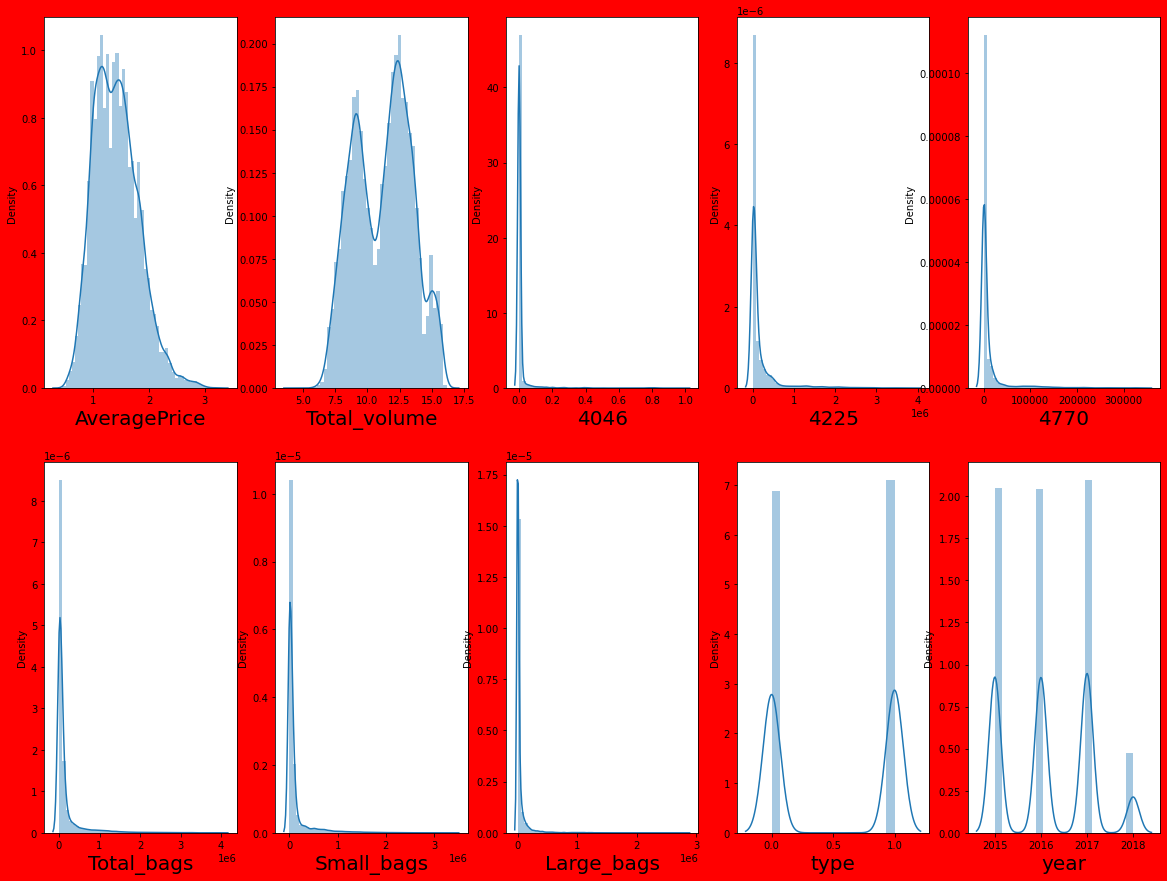

In [48]:

plt.figure(figsize=(20,15), facecolor='red')			
plotnumber=1			
			
for column in data:			
	if plotnumber<=10:		
		ax=plt.subplot(2,5,plotnumber)	
		sns.distplot(data[column])	
		plt.xlabel(column,fontsize=20)	
			
	plotnumber+=1		
plt.show()	

In [49]:
y=data['AveragePrice']
data.drop(columns=['year','Small_bags'],inplace=True)
X=data.drop(columns=['AveragePrice'])
data


,AveragePrice,Total_volume,4046,4225,4770,Total_bags,Large_bags,type
0,1.33,11.070329,0.000965,54454.85,48.16,8696.87,93.25,0
1,1.35,10.912849,0.001483,44638.81,58.33,9505.56,97.49,0
2,0.93,11.680304,0.001258,109149.67,130.50,8145.35,103.14,0
3,1.08,11.277104,0.000883,71976.41,72.58,5811.16,133.76,0
4,1.28,10.840357,0.001062,43838.39,75.78,6183.95,197.69,0
...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,0.000489,1529.20,0.00,13498.67,431.85,1
18245,1.71,9.538783,0.000839,3431.50,0.00,9264.84,324.80,1
18246,1.87,9.530012,0.000839,2452.79,727.94,9394.11,42.31,1
18247,1.93,9.693089,0.000655,2981.04,727.01,10969.54,50.00,1


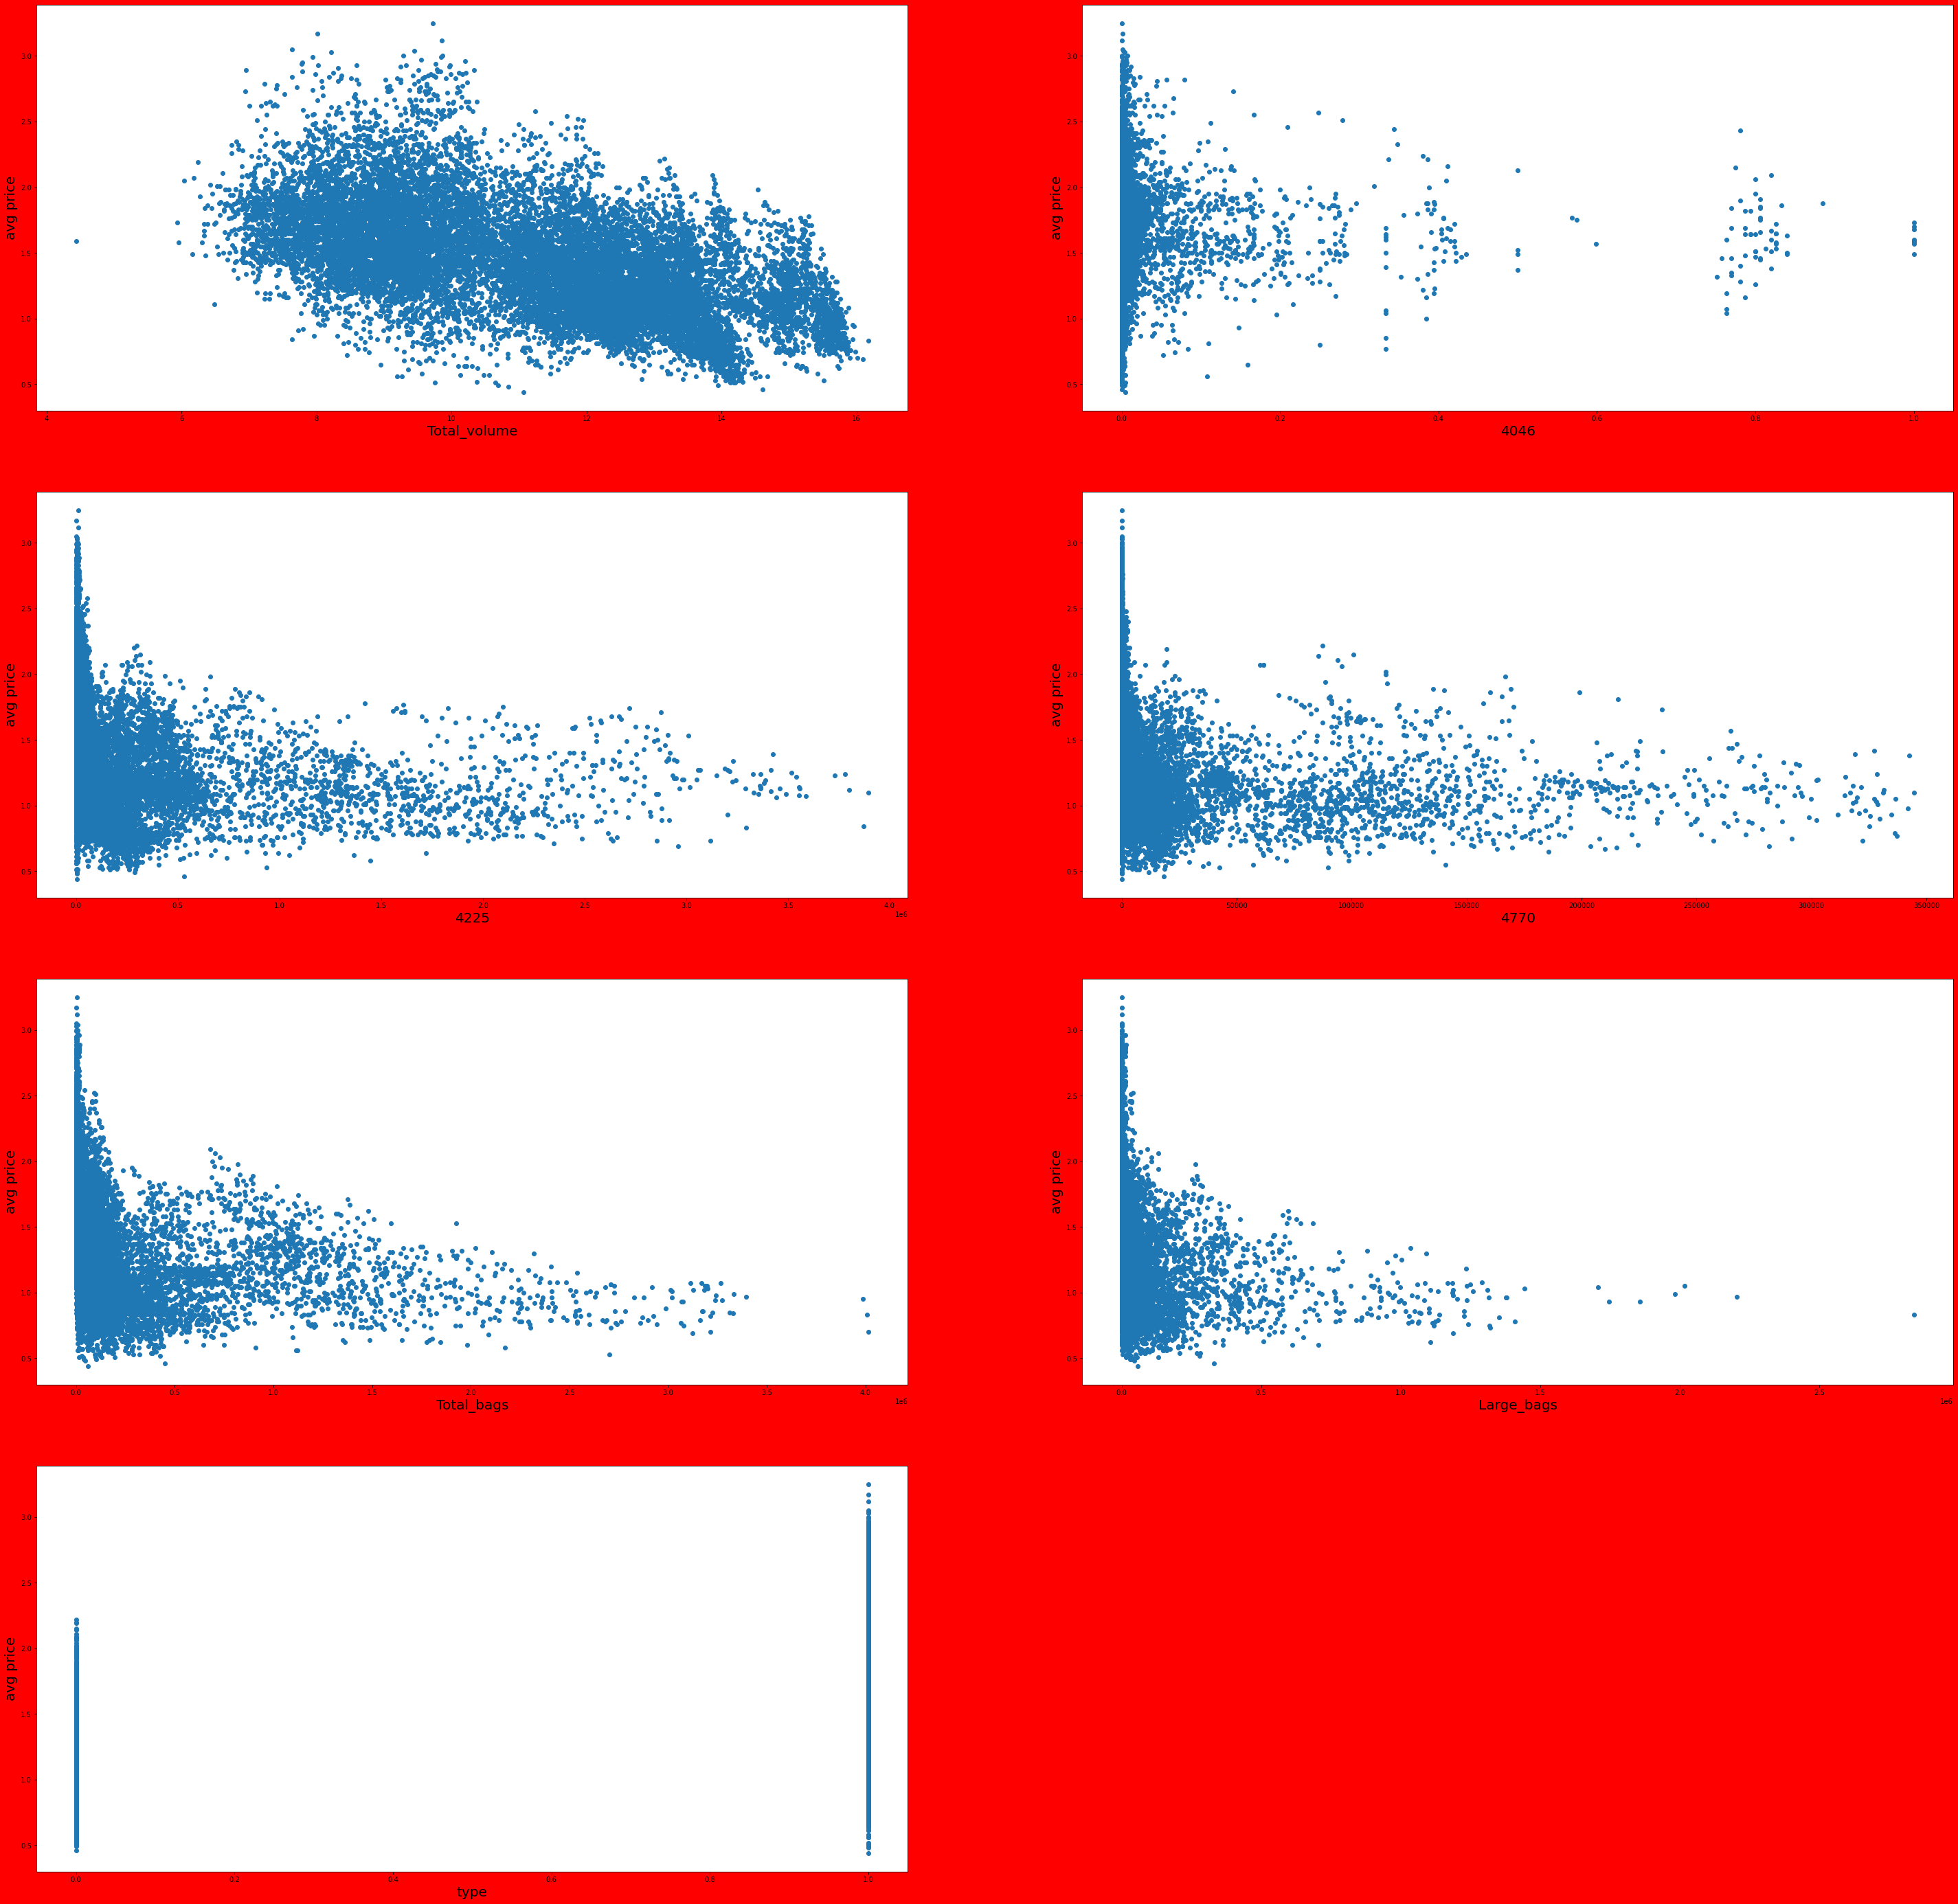

In [50]:
plt.figure(figsize=(50,50), facecolor='red')		
plotnumber=1		
		
for column in X:		
	if plotnumber<=8:	
		ax=plt.subplot(4,2,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('avg price',fontsize=20)
		
	plotnumber+=1	
plt.show()		


In [51]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
X_Scaled


array([[-0.0741955 , -0.15071602, -0.29334032, ..., -0.39856635,
        -0.30476494, -1.01553611],
       [-0.14540488, -0.14202117, -0.3166094 , ..., -0.39627661,
        -0.30472723, -1.01553611],
       [ 0.20162446, -0.14578966, -0.16368538, ..., -0.40012793,
        -0.30467698, -1.01553611],
       ...,
       [-0.7706987 , -0.15282189, -0.41661203, ..., -0.39659217,
        -0.30521801,  0.98470157],
       [-0.6969585 , -0.15591369, -0.4153598 , ..., -0.39213147,
        -0.30514962,  0.98470157],
       [-0.66246974, -0.16109802, -0.41684116, ..., -0.38917374,
        -0.30536299,  0.98470157]])

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y, test_size=0.25, random_state=333)


In [53]:
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [54]:
print('AveragePrice:', regression.predict(scaler.transform([[11.070329,0.000965,54454.85,48.16,8696.87,93.25,0]])))


AveragePrice: [1.25884606]


In [55]:
regression.score(x_test,y_test)

0.40394811580932877

In [56]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

lassocv=LassoCV(alphas=None, max_iter=10)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha




0.0002453847994802702

In [57]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_test, y_test)

0.40398716195635453

In [58]:
from sklearn.tree import DecisionTreeRegressor



In [59]:
def metric_score(clf, x_train,x_test, y_train, y_test, train=True):		
	if train:	
		y_pred=clf.predict(x_train)
		print(f"accuracy score: {accuracy_score(y_train, y_pred) *100:.2f}%")
		
	elif train==False:	
		pred=clf.predict(x_test)
		print(f"accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
		print('classification report', classification_report(y_test, pred, digits=2))
        


In [60]:
clf=DecisionTreeRegressor()
clf.fit(x_train, y_train)



DecisionTreeRegressor()

In [61]:
print('AveragePrice:', clf.predict(scaler.transform([[11.070329,0.000965,54454.85,48.16,8696.87,93.25,0]])))


AveragePrice: [1.33]


In [62]:
clf.score(x_test,y_test)

0.48176123767890333

In [63]:
grid_param={ 'criterion': ['mse'],'max_depth':range(10,15),'min_samples_leaf':range(2,6),'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,15)}


In [64]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)


In [65]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [66]:
best_parameters=grid_search.best_params_
print(best_parameters)


{'criterion': 'mse', 'max_depth': 10, 'max_leaf_nodes': 14, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [67]:
clf=DecisionTreeRegressor(criterion='mse', max_depth= 12, max_leaf_nodes= 14, min_samples_leaf= 4, min_samples_split= 7)
clf.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=12, max_leaf_nodes=14,
                      min_samples_leaf=4, min_samples_split=7)

In [68]:
print('AveragePrice:', clf.predict(scaler.transform([[11.070329,0.000965,54454.85,48.16,8696.87,93.25,0]])))

AveragePrice: [1.24644802]


In [69]:
clf.score(x_test,y_test)

0.5016219999577733